In [ ]:
# %pip install CMake
# %pip install dlib
# %pip install face_recognition
# %pip install mlxtend  

In [15]:
# import dlib
# import numpy as np
import imageio
import matplotlib.pyplot as plt
from mlxtend.image import extract_face_landmarks
import plotly.express as px
%matplotlib inline

## learning Area

In [22]:
test_img = 'AFLW2000_FF-GAN/image00002.jpg'
my_img = '/home/mahmoud/Pictures/Webcam/me.jpeg'
img = imageio.imread(my_img)
landmarks = extract_face_landmarks(img)
print(landmarks.shape)
print('\n\nFirst 10 landmarks:\n', landmarks[:10])

(68, 2)


First 10 landmarks:
 [[359 257]
 [361 278]
 [366 299]
 [372 319]
 [379 339]
 [391 357]
 [407 370]
 [427 378]
 [449 379]
 [470 375]]


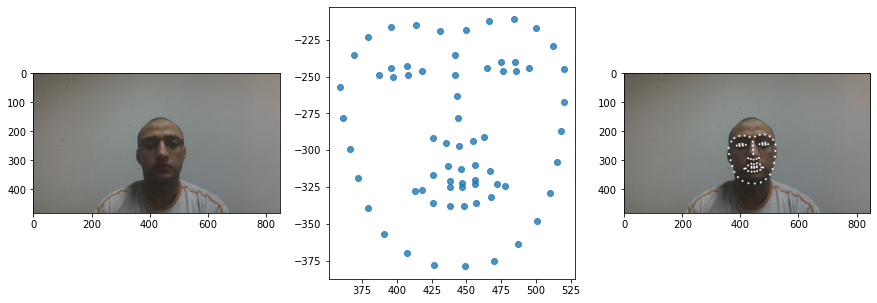

In [26]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)
img2 = img.copy()

for p in landmarks:
    img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
    # note that the values -3 and +3 will make the landmarks
    # overlayed on the image 6 pixels wide; depending on the
    # resolution of the face image, you may want to change
    # this value

ax.imshow(img2)
plt.show()

In [13]:
for p in landmarks:
    print(p)
    if input() == 'x' :
        break

[10 15]
x


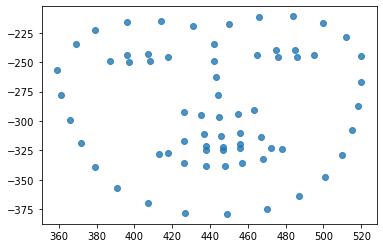

In [27]:
plt.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)

In [28]:
px.scatter(x = landmarks[:, 0], y = -landmarks[:, 1])

## Loading Data

In [29]:
import scipy.io as sio
import os

In [34]:
mat_files = []
for i in os.scandir('./AFLW2000/'):
    if i.path.endswith('mat'):
        mat_files.append(i.path)

In [36]:
test_file = sio.loadmat(mat_files[0])

In [38]:
test_file.keys()

dict_keys(['__header__', '__version__', '__globals__', 'pt2d', 'Illum_Para', 'Color_Para', 'Tex_Para', 'Shape_Para', 'Exp_Para', 'Pose_Para', 'roi', 'pt3d_68'])

In [40]:
l = test_file['pt3d_68']

In [41]:
l.shape

(3, 68)

In [45]:
l[2].shape

(68,)

In [47]:
m = test_file['pt2d']

In [49]:
m

array([[141.44585987, 172.97452229, 198.77070064, 258.96178344,
        281.89171975, 304.82165605, 161.50955414, 190.17197452,
        204.50318471, 247.49681529, 273.29299363, 299.08917197,
        132.84713376, 204.50318471, 233.1656051 , 253.22929936,
        336.35031847, 198.77070064, 230.29936306, 261.82802548,
        230.29936306],
       [201.63694268, 201.63694268, 210.23566879, 213.10191083,
        207.36942675, 207.36942675, 218.8343949 , 218.8343949 ,
        224.56687898, 224.56687898, 221.70063694, 224.56687898,
        244.63057325, 270.42675159, 270.42675159, 267.56050955,
        253.22929936, 299.08917197, 301.95541401, 304.82165605,
        350.68152866]])